In [69]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Used for calculating theoretical value
from scipy.special import factorial


In [2]:
df = pd.read_csv("data/tumor_diagnose.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df = df.drop('id', 1)

In [6]:
df = df.drop('Unnamed: 32', 1)

In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df.shape

(569, 31)

In [10]:
def normal_mu(df_column):
    n = df_column.shape[0]
    return np.sum(df_column) / n

In [11]:
normal_mu(df['radius_mean'])

14.127291739894552

In [12]:
def normal_sigma(df_column, mu):
    n = df_column.shape[0]
    return np.sqrt((np.sum((df_column - mu)**2)/n))

In [13]:
normal_sigma(df['radius_mean'], 14.127291739894552)

3.520950760711062

In [14]:
def likelihood_normal(df_column):
    n = df_column.shape[0]
    mu = normal_mu(df_column)
    sigma = normal_sigma(df_column, mu)
    first_term = -1 * n * np.log(2*math.pi) / 2
    second_term = -1 * n * np.log(sigma)
    third_term = -1 * n * np.sum((df_column-mu)**2) / (2*sigma**2)
    return first_term + second_term + third_term

In [15]:
likelihood_normal(df['radius_mean'])

-163119.5939960376

In [16]:
def rayleigh_theta(df_column):
    n = df_column.shape[0]
    return np.sum(df_column**2)/(2*n)

In [17]:
rayleigh_theta(df['radius_mean'])

105.98873308172232

In [18]:
def likelihood_rayleigh_right(df_column):
    n = df_column.shape[0]
    theta = rayleigh_theta(df_column)
    first_term = np.sum(np.log(df_column))
    second_term = -1 * n * np.log(theta)
    third_term = -1 * np.sum(df_column**2)/(2*theta)
    return first_term + second_term + third_term

In [19]:
likelihood_rayleigh_right(df['radius_mean'])

-1732.1508845394815

In [20]:
def likelihood_rayleigh_left(df_column):
    n = df_column.shape[0]
    theta = rayleigh_theta(df_column)
    first_term = -1 * np.sum(np.log(df_column))
    second_term = -1 * n * np.log(theta)
    third_term = -1 * np.sum(df_column**2)/(2*theta)
    return first_term + second_term + third_term

In [21]:
likelihood_rayleigh_left(df['radius_mean'])

-4712.721838197116

In [25]:
def poisson_lamda(df_column):
    n = df_column.shape[0]
    return np.sum(df_column) / n

In [35]:
def likelihood_poisson(df_column):
    n = df_column.shape[0]
    pois_lam = poisson_lamda(df_column)
    firt_term = n*np.log(np.exp(-pois_lam))
    second_term = np.log(pois_lam) * np.sum(df_column)
    third_term = -1 * np.sum(np.log(df_column.round().apply(factorial)))
    return firt_term + second_term + third_term
    

In [36]:
likelihood_poisson(df['radius_mean'])

-1511.3276845898145

In [27]:
df1 = df['radius_mean'].round().apply(factorial)


In [29]:
df1.apply(np.log)

0      36.395445
1      45.380139
2      42.335616
3      17.502308
4      42.335616
         ...    
564    48.471181
565    42.335616
566    33.505073
567    45.380139
568    10.604603
Name: radius_mean, Length: 569, dtype: float64

In [ ]:
df1.astype('int64')

In [ ]:
np.log(11240007277776)

In [33]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
print(likelihood_normal(df['radius_mean']))
print(likelihood_rayleigh_right(df['radius_mean']))
print(likelihood_rayleigh_left(df['radius_mean']))
print(likelihood_poisson(df['radius_mean']))

-163119.5939960376
-1732.1508845394815
-4712.721838197116
-1511.3276845898145


In [65]:
def getDistributionName(df_column):
    dist = {
        "likelihood_normal":likelihood_normal(df_column),
        "likelihood_rayleigh_right":likelihood_rayleigh_right(df_column),
        "likelihood_rayleigh_left":likelihood_rayleigh_left(df_column),
        "likelihood_poisson":likelihood_poisson(df_column)
    }
    dist = {k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}
    return list(dist.keys())[0]

In [66]:
getDistributionName(df['radius_mean'])

'likelihood_normal'

In [45]:
columns = df.shape[1]
columns_name = df.columns
print(columns)

31


In [67]:
for i in range(1,columns):
    #print(columns_name[i])
    column_name = columns_name[i]
    print(column_name + " -- " + getDistributionName(df[column_name]))

radius_mean -- likelihood_normal
texture_mean -- likelihood_normal
perimeter_mean -- likelihood_poisson
area_mean -- likelihood_poisson
smoothness_mean -- likelihood_normal
compactness_mean -- likelihood_normal
concavity_mean -- likelihood_rayleigh_right
concave points_mean -- likelihood_rayleigh_right
symmetry_mean -- likelihood_normal
fractal_dimension_mean -- likelihood_normal
radius_se -- likelihood_normal
texture_se -- likelihood_normal
perimeter_se -- likelihood_normal
area_se -- likelihood_poisson
smoothness_se -- likelihood_normal
compactness_se -- likelihood_normal
concavity_se -- likelihood_rayleigh_right
concave points_se -- likelihood_rayleigh_right
symmetry_se -- likelihood_normal
fractal_dimension_se -- likelihood_normal
radius_worst -- likelihood_normal
texture_worst -- likelihood_normal
perimeter_worst -- likelihood_poisson


/usr/local/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


area_worst -- likelihood_poisson
smoothness_worst -- likelihood_normal
compactness_worst -- likelihood_normal
concavity_worst -- likelihood_rayleigh_right
concave points_worst -- likelihood_rayleigh_right
symmetry_worst -- likelihood_normal
fractal_dimension_worst -- likelihood_normal


(array([ 7., 16., 47., 53., 98., 72., 57., 44., 23., 32., 15., 23., 20.,
        20., 11.,  9.,  7.,  2.,  4.,  3.,  3.,  1.,  1.,  0.,  1.]),
 array([ 50.41  ,  58.4416,  66.4732,  74.5048,  82.5364,  90.568 ,
         98.5996, 106.6312, 114.6628, 122.6944, 130.726 , 138.7576,
        146.7892, 154.8208, 162.8524, 170.884 , 178.9156, 186.9472,
        194.9788, 203.0104, 211.042 , 219.0736, 227.1052, 235.1368,
        243.1684, 251.2   ]),
 <a list of 25 Patch objects>)

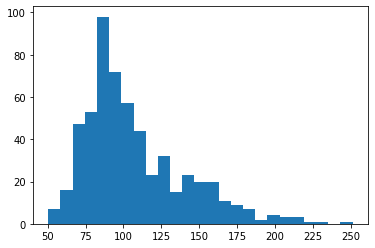

In [96]:
plt.hist(df['perimeter_worst'], 25)

(array([ 6., 10., 20., 60., 80., 93., 83., 78., 55., 24., 21.,  7.,  9.,
         7.,  2.,  6.,  3.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([0.1565  , 0.176792, 0.197084, 0.217376, 0.237668, 0.25796 ,
        0.278252, 0.298544, 0.318836, 0.339128, 0.35942 , 0.379712,
        0.400004, 0.420296, 0.440588, 0.46088 , 0.481172, 0.501464,
        0.521756, 0.542048, 0.56234 , 0.582632, 0.602924, 0.623216,
        0.643508, 0.6638  ]),
 <a list of 25 Patch objects>)

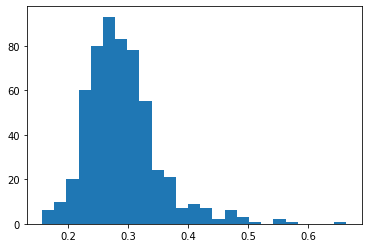

In [76]:
plt.hist(df['symmetry_worst'], 25)

In [94]:
def getDistributions(df_column):
    dist = {
        "likelihood_normal":likelihood_normal(df_column),
        "likelihood_rayleigh_right":likelihood_rayleigh_right(df_column),
        "likelihood_rayleigh_left":likelihood_rayleigh_left(df_column),
        "likelihood_poisson":likelihood_poisson(df_column)
    }
    return {k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}

In [95]:
getDistributions(df['symmetry_worst'])

{'likelihood_normal': -160819.4846890184,
 'likelihood_poisson': -369.32487047893085,
 'likelihood_rayleigh_right': 492.6204857814844,
 'likelihood_rayleigh_left': 1924.4538849165428}

In [85]:
df1 = df.drop('diagnosis', 1)

In [88]:
df2 = df1.apply(getDistributions, axis=0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [89]:
df2.head()

radius_mean        {'likelihood_normal': -163119.5939960376, 'lik...
texture_mean       {'likelihood_normal': -163232.96457554717, 'li...
perimeter_mean     {'likelihood_poisson': -inf, 'likelihood_norma...
area_mean          {'likelihood_poisson': -inf, 'likelihood_norma...
smoothness_mean    {'likelihood_normal': -159976.58685192477, 'li...
dtype: object